In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

## accel_7_fast_and_stop

In [2]:
# Import CVS files
accel_7_fast_and_stop = pd.read_csv('Accel_7_fast_and_stop_31_05_2022_cleaned.csv')

In [3]:
# Check the data
accel_7_fast_and_stop.info()
accel_7_fast_and_stop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  130 non-null    int64  
 1   Timestamp   130 non-null    object 
 2   Data        130 non-null    object 
 3   AX          130 non-null    int64  
 4   AY          130 non-null    int64  
 5   AZ          130 non-null    int64  
 6   fAX         130 non-null    float64
 7   fAY         130 non-null    float64
 8   fAZ         130 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 9.3+ KB


,Unnamed: 0,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ
0,0,18:12:21:234,0001462415 [app] INFO: ACCEL:,-704,-480,576,26.766279,168.241196,8.758143
1,1,18:12:21:325,0001462551 [app] INFO: ACCEL:,-2016,1984,96,-3.032218,195.304382,10.175572
2,2,18:12:21:416,0001462641 [app] INFO: ACCEL:,-1024,-544,1824,-18.302029,184.058868,39.223648
3,3,18:12:21:507,0001462731 [app] INFO: ACCEL:,-960,-288,1600,-32.457813,176.883011,64.703102
4,4,18:12:21:603,0001462821 [app] INFO: ACCEL:,-1216,448,1792,-50.310703,180.980347,93.299789


In [4]:
# Function to calculate seconds
def get_seconds(time_str):
    hh, mm, ss , ms = time_str.split(':')
    return int(hh) * 3600 + int(mm) * 60 + int(ss) + int(ms) / 1000

In [5]:
# Write second calcutions to unnamed column and change column name
i = 0
for i in range(accel_7_fast_and_stop.shape[0]):
    accel_7_fast_and_stop.iloc[i,0] = get_seconds(accel_7_fast_and_stop.iloc[i,1])

In [6]:
# Rename the column as second
accel_7_fast_and_stop.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)

# Check the df tail
accel_7_fast_and_stop.tail()

,time_seconds,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ
125,65572.692,18:12:52:692,0001493691 [app] INFO: ACCEL:,704,3360,-4448,312.166443,208.524948,-731.708069
126,65572.871,18:12:52:871,0001494096 [app] INFO: ACCEL:,-608,-864,-864,281.453430,168.326477,-738.467224
127,65573.096,18:12:53:096,0001494186 [app] INFO: ACCEL:,2080,-1472,-3392,340.579681,107.843437,-867.777893
128,65573.274,18:12:53:274,0001494411 [app] INFO: ACCEL:,1088,64,-1504,365.196198,106.235031,-898.833679
129,65573.364,18:12:53:364,0001494591 [app] INFO: ACCEL:,1184,160,32,391.681519,108.139221,-854.986511


In [7]:
# Adding time delta column
accel_7_fast_and_stop.insert(1,'time_seconds_delta','')

i = 1
for i in range(accel_7_fast_and_stop.shape[0]):
    accel_7_fast_and_stop.iloc[i,1] = (accel_7_fast_and_stop.iloc[i,0] - accel_7_fast_and_stop.iloc[i-1,0])
    
accel_7_fast_and_stop.iloc[0,1] = 0

In [8]:
# Checking the head of df
accel_7_fast_and_stop.head()

,time_seconds,time_seconds_delta,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ
0,65541.234,0,18:12:21:234,0001462415 [app] INFO: ACCEL:,-704,-480,576,26.766279,168.241196,8.758143
1,65541.325,0.091,18:12:21:325,0001462551 [app] INFO: ACCEL:,-2016,1984,96,-3.032218,195.304382,10.175572
2,65541.416,0.091,18:12:21:416,0001462641 [app] INFO: ACCEL:,-1024,-544,1824,-18.302029,184.058868,39.223648
3,65541.507,0.091,18:12:21:507,0001462731 [app] INFO: ACCEL:,-960,-288,1600,-32.457813,176.883011,64.703102
4,65541.603,0.096,18:12:21:603,0001462821 [app] INFO: ACCEL:,-1216,448,1792,-50.310703,180.980347,93.299789


<AxesSubplot:xlabel='time_seconds_delta', ylabel='Count'>

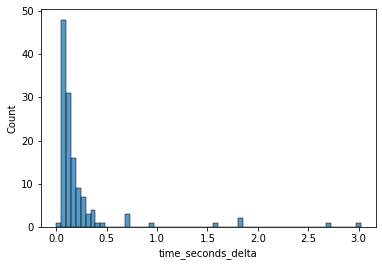

In [9]:
# Checking how does time_seconds_delta look like in histogram
sns.histplot(data=accel_7_fast_and_stop, x="time_seconds_delta")

In [10]:
# Adding a speed_change column
accel_7_fast_and_stop['speed_change'] = (accel_7_fast_and_stop['time_seconds_delta'] * accel_7_fast_and_stop['AX'])
accel_7_fast_and_stop['filtered_speed_change'] = (accel_7_fast_and_stop['time_seconds_delta'] * accel_7_fast_and_stop['fAX'])

In [11]:
# Checking range of speed change to understand how they define normal ride
# Check data types of new columns
accel_7_fast_and_stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_seconds           130 non-null    float64
 1   time_seconds_delta     130 non-null    object 
 2   Timestamp              130 non-null    object 
 3   Data                   130 non-null    object 
 4   AX                     130 non-null    int64  
 5   AY                     130 non-null    int64  
 6   AZ                     130 non-null    int64  
 7   fAX                    130 non-null    float64
 8   fAY                    130 non-null    float64
 9   fAZ                    130 non-null    float64
 10  speed_change           130 non-null    object 
 11  filtered_speed_change  130 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 12.3+ KB


In [12]:
# Change new column types as float for quantitative analysis
accel_7_fast_and_stop['time_seconds_delta'] = accel_7_fast_and_stop['time_seconds_delta'].astype(float)
accel_7_fast_and_stop['speed_change'] = accel_7_fast_and_stop['speed_change'].astype(float)
accel_7_fast_and_stop['filtered_speed_change'] = accel_7_fast_and_stop['filtered_speed_change'].astype(float)

In [13]:
# Checking descriptive statistics
accel_7_fast_and_stop.describe()

,time_seconds,time_seconds_delta,AX,AY,AZ,fAX,fAY,fAZ,speed_change,filtered_speed_change
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,65554.916438,0.247154,90.584615,123.323077,-310.153846,30.933625,122.630815,-255.409298,9.569231,-4.796562
std,10.704617,0.426722,2537.742431,2909.888285,3607.448974,153.177749,153.632143,371.400954,866.305835,69.996753
min,65541.234000,0.000000,-7552.000000,-13632.000000,-14080.000000,-249.896500,-637.742432,-1948.152466,-5452.544000,-491.205150
25%,65546.732250,0.091000,-952.000000,-744.000000,-1504.000000,-50.206300,97.321994,-429.819328,-118.456000,-5.922797
50%,65551.049000,0.134500,96.000000,272.000000,-336.000000,8.452180,146.113800,-119.140327,8.848000,0.816458
75%,65563.894000,0.216000,992.000000,1024.000000,952.000000,62.062187,184.391891,-14.724391,127.024000,13.235345
max,65573.364000,3.018000,16032.000000,11136.000000,17312.000000,613.334656,754.582275,364.405396,6084.288000,262.133570


<AxesSubplot:xlabel='speed_change', ylabel='Count'>

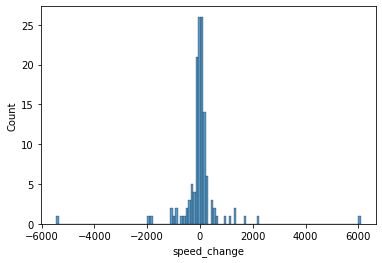

In [14]:
# Checking how does speed change look like in histogram
sns.histplot(data=accel_7_fast_and_stop, x="speed_change")

<AxesSubplot:xlabel='filtered_speed_change', ylabel='Count'>

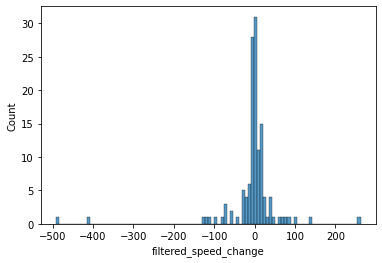

In [15]:
# Checking how does speed change look like in histogram
sns.histplot(data=accel_7_fast_and_stop, x="filtered_speed_change")

In [16]:
# Amag is equal to (Ax^2+Ay^2+Az^2)^.5
# Calculating Amag using acceleration data
accel_7_fast_and_stop['Amag'] = (accel_7_fast_and_stop['AX']**2 + accel_7_fast_and_stop['AY']**2 + accel_7_fast_and_stop['AZ']**2)**0.5
accel_7_fast_and_stop['fAmag'] = (accel_7_fast_and_stop['fAX']**2 + accel_7_fast_and_stop['fAY']**2 + accel_7_fast_and_stop['fAZ']**2)**0.5

### Note: 

- I use the 'Max-min'normalisation technique.
- Formula: x' = x - xmin/(xmax - xmin)

In [17]:
# Calculate normalised fAmag using 'Max-min' method.

accel_7_fast_and_stop['fAmag_norm'] = ((accel_7_fast_and_stop['fAmag'] - accel_7_fast_and_stop['fAmag'].min())/ 
                                     (accel_7_fast_and_stop['fAmag'].max() - accel_7_fast_and_stop['fAmag'].min()))


In [18]:
# Create function to calculate the different thresholds level and return "classification data".
# Below tresholds are based on 2nd normal ride file (1_hr_ride)

def Amag_Q3_thresholds(value):
    
    if value > 0.130572:
        return 'Abnormal data'
    
    else:
        return 'Normal data'


# Create standard deviation threshold functions.

# If value is greater than the mean +/- the standard deviation (of the normal ride data)

def Amag_std_threshold(value):
    
    if value > 0.087960 +0.107392:
        return 'Abnormal data'
    
    elif value < 0.087960 - 0.107392:
        return 'Abnormal data'
    else: 
        return 'Normal data'

# Create hihg outlier threhsold function.

def Amag_HO_threshold(value):
    
    if value > 0.311921:
        return 'Abnormal data'
    else:
        return 'Normal data'

In [19]:
# Apply the different thresholds to data. 

# Q3 (75th percentile) threshold
accel_7_fast_and_stop['Q3 threshold'] = accel_7_fast_and_stop['fAmag_norm'].apply(Amag_Q3_thresholds)

# Standard deviation threshold
accel_7_fast_and_stop['Std threshold'] = accel_7_fast_and_stop['fAmag_norm'].apply(Amag_std_threshold)

# High Outlier threshold
accel_7_fast_and_stop['HO threshold'] = accel_7_fast_and_stop['fAmag_norm'].apply(Amag_HO_threshold)

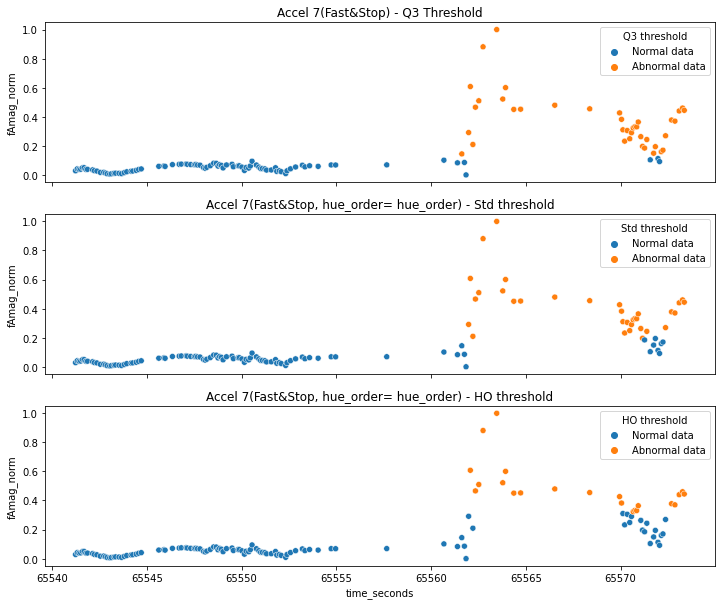

In [20]:
# Visualise the simple classification of normalised fAmag data.

hue_order = ['Normal data', 'Abnormal data']

fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=accel_7_fast_and_stop, ax=axes[0], x = 'time_seconds', y = 'fAmag_norm', hue = 'Q3 threshold', hue_order= hue_order).set(title = 'Accel 7(Fast&Stop) - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=accel_7_fast_and_stop, ax=axes[1], x = 'time_seconds', y = 'fAmag_norm', hue = 'Std threshold').set(title = 'Accel 7(Fast&Stop, hue_order= hue_order) - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=accel_7_fast_and_stop, ax=axes[2], x = 'time_seconds', y = 'fAmag_norm', hue = 'HO threshold').set(title = 'Accel 7(Fast&Stop, hue_order= hue_order) - HO threshold')

fig.savefig("Accel 7 Abnormalities_2.png")


In [21]:
accel_7_fast_and_stop_Q3_levels= accel_7_fast_and_stop.groupby('Q3 threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
accel_7_fast_and_stop_Q3_levels

,Duration
Q3 threshold,
Abnormal data,11.346
Normal data,20.784


In [22]:
accel_7_fast_and_stop_Std_levels= accel_7_fast_and_stop.groupby('Std threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
accel_7_fast_and_stop_Std_levels

,Duration
Std threshold,
Abnormal data,10.561
Normal data,21.569


In [23]:
accel_7_fast_and_stop_HO_levels= accel_7_fast_and_stop.groupby('HO threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
accel_7_fast_and_stop_HO_levels

,Duration
HO threshold,
Abnormal data,9.282
Normal data,22.848


In [24]:
# Install necessary library for df export as png
import dataframe_image as dfi

#Saving the dataframe as png
dfi.export(accel_7_fast_and_stop_Q3_levels.head(1),"accel_7_fast_and_stop_Q3_levels.png")
dfi.export(accel_7_fast_and_stop_Std_levels.head(1),"accel_7_fast_and_stop_Std_levels.png")
dfi.export(accel_7_fast_and_stop_HO_levels.head(1),"accel_7_fast_and_stop_HO_levels.png")

#dfi.export(accel_7_fast_and_stop_Q3_levels,"accel_7_fast_and_stop_Q3_levels.png")
#dfi.export(accel_7_fast_and_stop_Std_levels,"accel_7_fast_and_stop_Std_levels.png")
#dfi.export(accel_7_fast_and_stop_HO_levels,"accel_7_fast_and_stop_HO_levels.png")

objc[75669]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x118134668). One of the two will be used. Which one is undefined.
[1022/145331.838644:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpueyzrtuk/temp.png.
objc[75682]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10db1e668). One of the two will be used. Which one is undefined.
[1022/145332.627097:INFO:headless_shell.cc

In [25]:
# Export as new CSV for Step 
accel_7_fast_and_stop.to_csv('accel_7_fast_and_stop_normal_vs_abnormal.csv')

## Gyro_4_throwing_bike

In [26]:
# Import CVS files
Gyro_4_throwing_bike = pd.read_csv('Gyro_4_throwing_bike_31_05_2022_cleaned.csv')

In [27]:
# Check the data
Gyro_4_throwing_bike.info()
Gyro_4_throwing_bike.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  182 non-null    int64  
 1   Timestamp   182 non-null    object 
 2   Data        182 non-null    object 
 3   X           182 non-null    float64
 4   Y           182 non-null    float64
 5   Z           182 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.7+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
177,177,18:56:00:990,0000344126 [app] INFO: GYRO:,-0.027,-0.033,-0.028
178,178,18:56:01:131,0000344261 [app] INFO: GYRO:,-0.027,-0.033,-0.028
179,179,18:56:01:216,0000344351 [app] INFO: GYRO:,-0.027,-0.033,-0.028
180,180,18:56:01:306,0000344441 [app] INFO: GYRO:,-0.027,-0.033,-0.028
181,181,18:56:01:396,0000344531 [app] INFO: GYRO:,-0.027,-0.033,-0.028


In [28]:
# Write second calcutions to unnamed column and change column name
i = 0
for i in range(Gyro_4_throwing_bike.shape[0]):
    Gyro_4_throwing_bike.iloc[i,0] = get_seconds(Gyro_4_throwing_bike.iloc[i,1])

In [29]:
# Rename the column as second
Gyro_4_throwing_bike.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)

# Check the df tail
Gyro_4_throwing_bike.tail()

,time_seconds,Timestamp,Data,X,Y,Z
177,68160.990,18:56:00:990,0000344126 [app] INFO: GYRO:,-0.027,-0.033,-0.028
178,68161.131,18:56:01:131,0000344261 [app] INFO: GYRO:,-0.027,-0.033,-0.028
179,68161.216,18:56:01:216,0000344351 [app] INFO: GYRO:,-0.027,-0.033,-0.028
180,68161.306,18:56:01:306,0000344441 [app] INFO: GYRO:,-0.027,-0.033,-0.028
181,68161.396,18:56:01:396,0000344531 [app] INFO: GYRO:,-0.027,-0.033,-0.028


In [30]:
# Adding time delta column
Gyro_4_throwing_bike.insert(1,'time_seconds_delta','')

i = 1
for i in range(Gyro_4_throwing_bike.shape[0]):
    Gyro_4_throwing_bike.iloc[i,1] = (Gyro_4_throwing_bike.iloc[i,0] - Gyro_4_throwing_bike.iloc[i-1,0])
    
Gyro_4_throwing_bike.iloc[0,1] = 0

In [31]:
# Checking the head of df
Gyro_4_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z
0,68143.665,0,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148
1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148
2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148
3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148
4,68144.117,0.09,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148


In [32]:
# Change time_seconds_delta column as float for quantitative analysis
Gyro_4_throwing_bike['time_seconds_delta'] = Gyro_4_throwing_bike['time_seconds_delta'].astype(float)

In [33]:
# Checking descriptive statistics
Gyro_4_throwing_bike.describe()

,time_seconds,time_seconds_delta,X,Y,Z
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,68152.569462,0.097423,-2.867407,-0.271071,6.999632
std,5.122721,0.025345,4.521124,0.448857,9.984370
min,68143.665000,0.000000,-9.821000,-0.952000,-0.273000
25%,68148.324750,0.089000,-9.821000,-0.952000,-0.273000
50%,68152.488000,0.091000,0.351000,0.059000,-0.273000
75%,68157.042500,0.093000,0.351000,0.059000,21.029000
max,68161.396000,0.312000,0.351000,0.059000,21.029000


In [34]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
Gyro_4_throwing_bike['Gmag'] = (Gyro_4_throwing_bike['X']**2 + Gyro_4_throwing_bike['Y']**2 + Gyro_4_throwing_bike['Z']**2)**0.5

In [35]:
# Calculate normalised Gmag using 'Max-min' method.

Gyro_4_throwing_bike['Gmag_norm'] = ((Gyro_4_throwing_bike['Gmag'] - Gyro_4_throwing_bike['Gmag'].min())/ 
                                     (Gyro_4_throwing_bike['Gmag'].max() - Gyro_4_throwing_bike['Gmag'].min()))


In [36]:
# Checking the head of df
Gyro_4_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm
0,68143.665,0.000,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
4,68144.117,0.090,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702


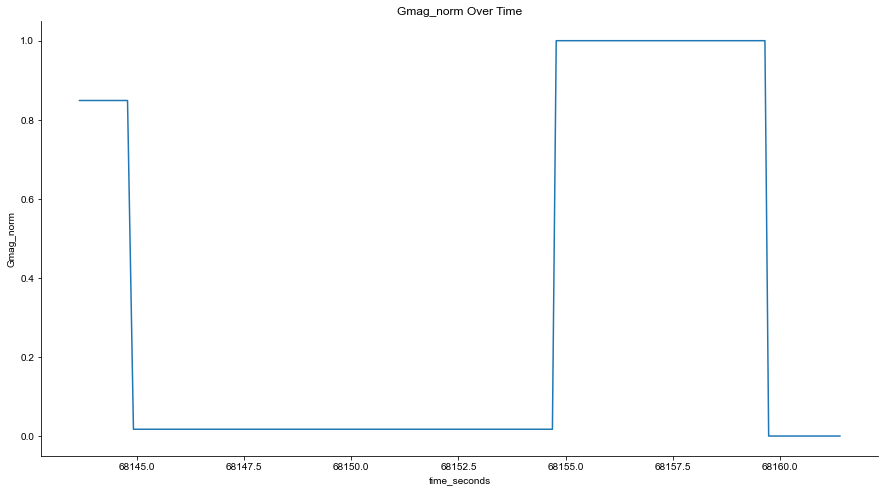

In [37]:
# Adjusting the size and adding title
plt.figure(figsize=(15,8))
plt.title('Gmag_norm Over Time')

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.dpi':144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
sns.despine()

# Creating the line plot
ax=sns.lineplot(data=Gyro_4_throwing_bike, x='time_seconds', y='Gmag_norm')

#Saving the line plot
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig('Gyro_4_Gmag_norm Over Time.png')

In [38]:
# Check how long bike stayed in different Gmag Zones
Gyro4_Gmag_norm_levels = Gyro_4_throwing_bike.groupby('Gmag_norm').agg(
    Time_Start=('time_seconds', np.min),
    Time_End=('time_seconds', np.max),
    Duration=('time_seconds_delta',np.sum))

# View the df
Gyro4_Gmag_norm_levels

,Time_Start,Time_End,Duration
Gmag_norm,,,
0.000000,68159.730,68161.396,1.753
0.017152,68144.928,68154.691,9.901
0.848702,68143.665,68144.790,1.125
1.000000,68154.780,68159.643,4.952


In [39]:
# Install necessary library for df export as png
import dataframe_image as dfi

#Saving the dataframe as png
dfi.export(Gyro4_Gmag_norm_levels,"Gyro4_Gmag_norm_levels.png")

objc[75714]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x11a315668). One of the two will be used. Which one is undefined.
[1022/145336.636434:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpdj5pr3en/temp.png.


In [40]:
# Create function to calculate the different thresholds level and return "classification data".
# Below tresholds are based on 1st normal ride file (1hr Normal Ride)

def Gmag_Q3_thresholds(value):
    
    if value > 0.191209:
        return 'Abnormal data'
    
    else:
        return 'Normal data'


# Create standard deviation threshold functions.

# If value is greater than the mean +/- the standard deviation (of the normal ride data)

def Gmag_std_threshold(value):
    
    if value > 0.140894 +0.168974:
        return 'Abnormal data'
    
    elif value < 0.140894 - 0.168974:
        return 'Abnormal data'
    else: 
        return 'Normal data'

# Create high outlier threhsold function.

def Gmag_HO_threshold(value):
    
    if value > 0.433552:
        return 'Abnormal data'
    else:
        return 'Normal data'

In [41]:
# Apply the different thresholds to data. 

# Q3 (75th percentile) threshold
Gyro_4_throwing_bike['Q3 threshold'] = Gyro_4_throwing_bike['Gmag_norm'].apply(Gmag_Q3_thresholds)

# Standard deviation threshold
Gyro_4_throwing_bike['Std threshold'] = Gyro_4_throwing_bike['Gmag_norm'].apply(Gmag_std_threshold)

# High Outlier threshold
Gyro_4_throwing_bike['HO threshold'] = Gyro_4_throwing_bike['Gmag_norm'].apply(Gmag_HO_threshold)

In [42]:
# Preview the data.
Gyro_4_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68143.665,0.000,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
4,68144.117,0.090,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data


In [43]:
# Check the distribution of normal/abnormal for each threshold

print(Gyro_4_throwing_bike['Q3 threshold'].value_counts())
print(Gyro_4_throwing_bike['Std threshold'].value_counts())
print(Gyro_4_throwing_bike['HO threshold'].value_counts())

Normal data      119
Abnormal data     63
Name: Q3 threshold, dtype: int64
Normal data      119
Abnormal data     63
Name: Std threshold, dtype: int64
Normal data      119
Abnormal data     63
Name: HO threshold, dtype: int64


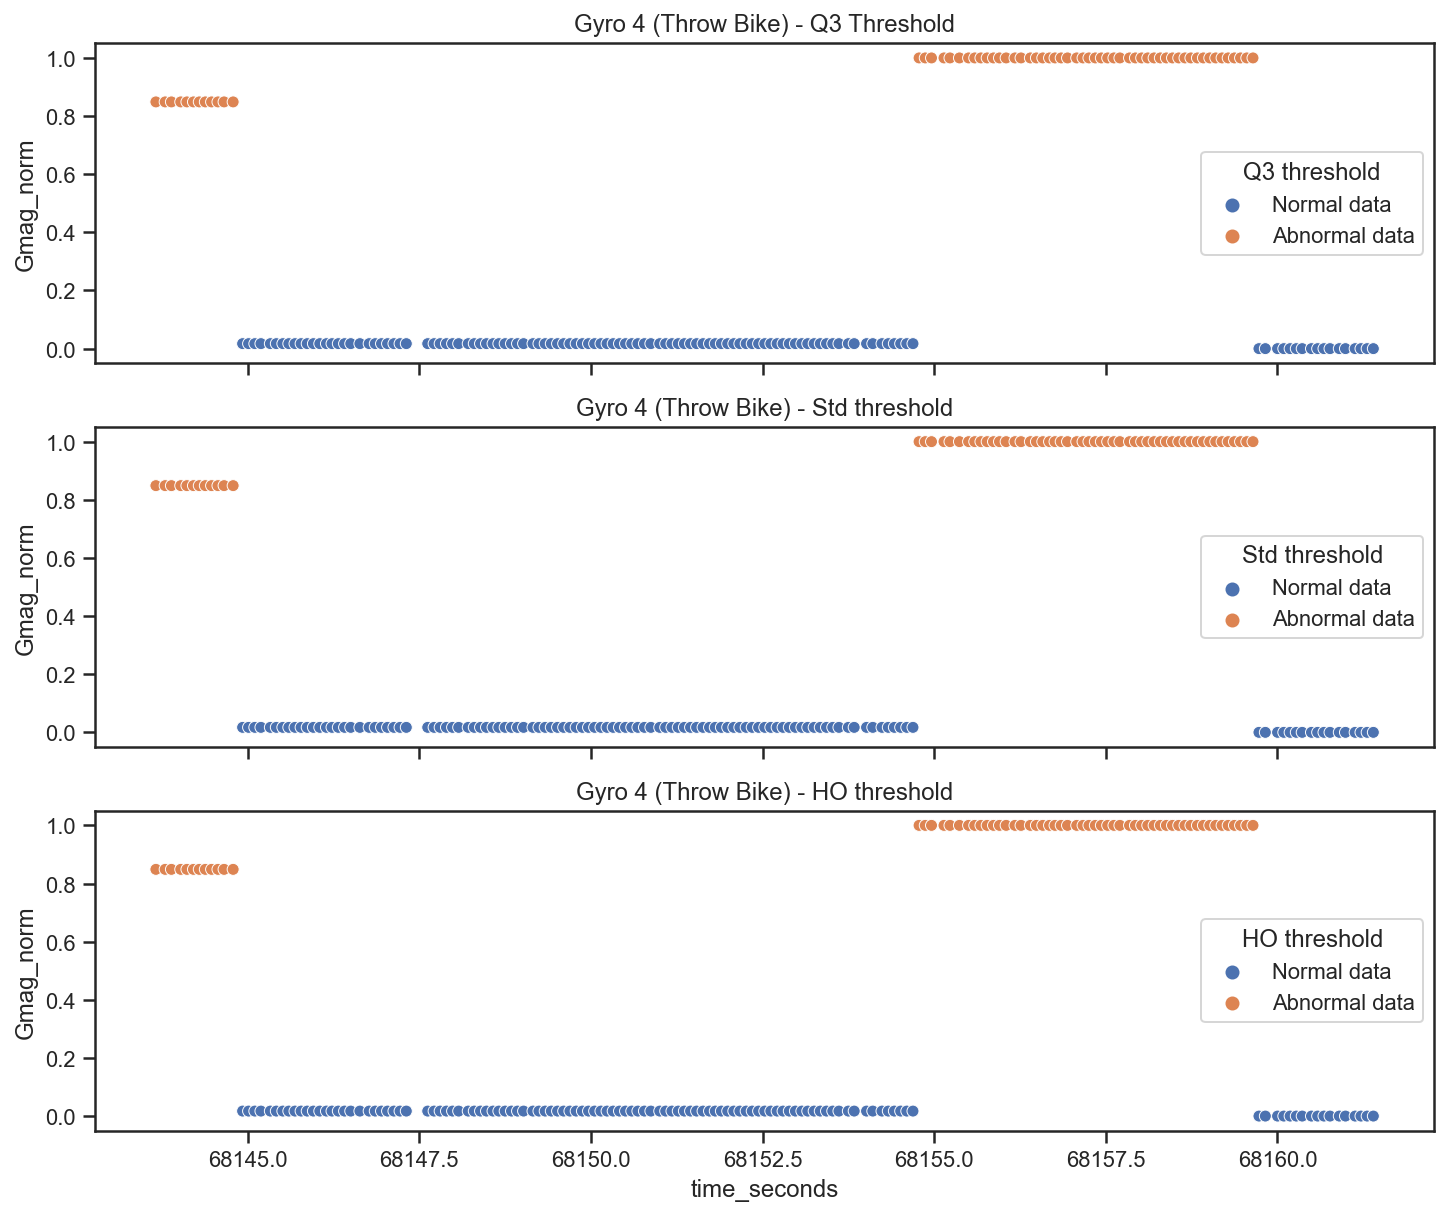

In [44]:
# Visualise the simple classification of normalised fAmag data.

hue_order = ['Normal data', 'Abnormal data']

fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Gyro_4_throwing_bike, ax=axes[0], x = 'time_seconds', y = 'Gmag_norm', hue = 'Q3 threshold', hue_order= hue_order).set(title = 'Gyro 4 (Throw Bike) - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Gyro_4_throwing_bike, ax=axes[1], x = 'time_seconds', y = 'Gmag_norm', hue = 'Std threshold', hue_order= hue_order).set(title = 'Gyro 4 (Throw Bike) - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Gyro_4_throwing_bike, ax=axes[2], x = 'time_seconds', y = 'Gmag_norm', hue = 'HO threshold', hue_order= hue_order).set(title = 'Gyro 4 (Throw Bike) - HO threshold')

fig.savefig("Gyro_4_throwing_bike Abnormalities.png")


In [45]:
Gyro_4_throwing_bike_Q3_levels= Gyro_4_throwing_bike.groupby('Q3 threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
Gyro_4_throwing_bike_Q3_levels

,Duration
Q3 threshold,
Abnormal data,6.077
Normal data,11.654


In [46]:
Gyro_4_throwing_bike_Std_levels= Gyro_4_throwing_bike.groupby('Std threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
Gyro_4_throwing_bike_Std_levels

,Duration
Std threshold,
Abnormal data,6.077
Normal data,11.654


In [47]:
Gyro_4_throwing_bike_HO_levels= Gyro_4_throwing_bike.groupby('HO threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
Gyro_4_throwing_bike_HO_levels

,Duration
HO threshold,
Abnormal data,6.077
Normal data,11.654


In [48]:
# Install necessary library for df export as png
import dataframe_image as dfi

#Saving the dataframe as png
dfi.export(Gyro_4_throwing_bike_Q3_levels.head(1),"Gyro_4_throwing_bike_Q3_levels.png")
dfi.export(Gyro_4_throwing_bike_Std_levels.head(1),"Gyro_4_throwing_bike_Std_levels.png")
dfi.export(Gyro_4_throwing_bike_HO_levels.head(1),"Gyro_4_throwing_bike_HO_levels.png")

#dfi.export(Gyro_4_throwing_bike_Q3_levels,"Gyro_4_throwing_bike_Q3_levels.png")
#dfi.export(Gyro_4_throwing_bike_Std_levels,"Gyro_4_throwing_bike_Std_levels.png")
#dfi.export(Gyro_4_throwing_bike_HO_levels,"Gyro_4_throwing_bike_HO_levels.png")

objc[75725]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x1114d5668). One of the two will be used. Which one is undefined.
[1022/145339.106500:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpfokr26j9/temp.png.
objc[75735]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x1113ca668). One of the two will be used. Which one is undefined.
[1022/145339.978764:INFO:headless_shell.cc

In [49]:
# Export as new CSV for Step 
Gyro_4_throwing_bike.to_csv('Gyro_4_throwing_bike_normal_vs_abnormal.csv')

## Gyro_5_throwing_bike

In [50]:
# Import CVS files
Gyro_5_throwing_bike = pd.read_csv('Gyro_5_throwing_bike_31_05_2022_cleaned.csv')

In [51]:
# Check the data
Gyro_5_throwing_bike.info()
Gyro_5_throwing_bike.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  97 non-null     int64  
 1   Timestamp   97 non-null     object 
 2   Data        97 non-null     object 
 3   X           97 non-null     float64
 4   Y           97 non-null     float64
 5   Z           97 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.7+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
92,92,18:56:47:115,0000390251 [app] INFO: GYRO:,0.807,0.062,0.522
93,93,18:56:47:210,0000390341 [app] INFO: GYRO:,0.807,0.062,0.522
94,94,18:56:47:296,0000390431 [app] INFO: GYRO:,0.807,0.062,0.522
95,95,18:56:47:389,0000390521 [app] INFO: GYRO:,0.807,0.062,0.522
96,96,18:56:47:525,0000390611 [app] INFO: GYRO:,0.807,0.062,0.522


In [52]:
# Write second calcutions to unnamed column and change column name
i = 0
for i in range(Gyro_5_throwing_bike.shape[0]):
    Gyro_5_throwing_bike.iloc[i,0] = get_seconds(Gyro_5_throwing_bike.iloc[i,1])

In [53]:
# Rename the column as second
Gyro_5_throwing_bike.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)

# Check the df tail
Gyro_5_throwing_bike.tail()

,time_seconds,Timestamp,Data,X,Y,Z
92,68207.115,18:56:47:115,0000390251 [app] INFO: GYRO:,0.807,0.062,0.522
93,68207.210,18:56:47:210,0000390341 [app] INFO: GYRO:,0.807,0.062,0.522
94,68207.296,18:56:47:296,0000390431 [app] INFO: GYRO:,0.807,0.062,0.522
95,68207.389,18:56:47:389,0000390521 [app] INFO: GYRO:,0.807,0.062,0.522
96,68207.525,18:56:47:525,0000390611 [app] INFO: GYRO:,0.807,0.062,0.522


In [54]:
# Adding time delta column
Gyro_5_throwing_bike.insert(1,'time_seconds_delta','')

i = 1
for i in range(Gyro_5_throwing_bike.shape[0]):
    Gyro_5_throwing_bike.iloc[i,1] = (Gyro_5_throwing_bike.iloc[i,0] - Gyro_5_throwing_bike.iloc[i-1,0])
    
Gyro_5_throwing_bike.iloc[0,1] = 0

In [55]:
# Checking the head of df
Gyro_5_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z
0,68196.812,0,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901
1,68196.902,0.09,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901
2,68196.992,0.09,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901
3,68197.082,0.09,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901
4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901


In [56]:
# Change time_seconds_delta column as float for quantitative analysis
Gyro_5_throwing_bike['time_seconds_delta'] = Gyro_5_throwing_bike['time_seconds_delta'].astype(float)

In [57]:
# Checking descriptive statistics
Gyro_5_throwing_bike.describe()

,time_seconds,time_seconds_delta,X,Y,Z
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68201.911474,0.110443,-2.615093,-0.944814,8.643577
std,3.156941,0.038398,3.187276,1.044640,8.369027
min,68196.812000,0.000000,-5.942000,-2.039000,0.522000
25%,68199.243000,0.089000,-5.942000,-2.039000,0.901000
50%,68201.760000,0.091000,0.066000,0.027000,0.901000
75%,68204.551000,0.134000,0.066000,0.027000,17.409000
max,68207.525000,0.315000,0.807000,0.062000,17.409000


In [58]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
Gyro_5_throwing_bike['Gmag'] = (Gyro_5_throwing_bike['X']**2 + Gyro_5_throwing_bike['Y']**2 + Gyro_5_throwing_bike['Z']**2)**0.5

In [59]:
# Calculate normalised Gmag using 'Max-min' method.

Gyro_5_throwing_bike['Gmag_norm'] = ((Gyro_5_throwing_bike['Gmag'] - Gyro_5_throwing_bike['Gmag'].min())/ 
                                     (Gyro_5_throwing_bike['Gmag'].max() - Gyro_5_throwing_bike['Gmag'].min()))


In [60]:
# Checking the head of df
Gyro_5_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm
0,68196.812,0.000,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
1,68196.902,0.090,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
2,68196.992,0.090,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
3,68197.082,0.090,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0


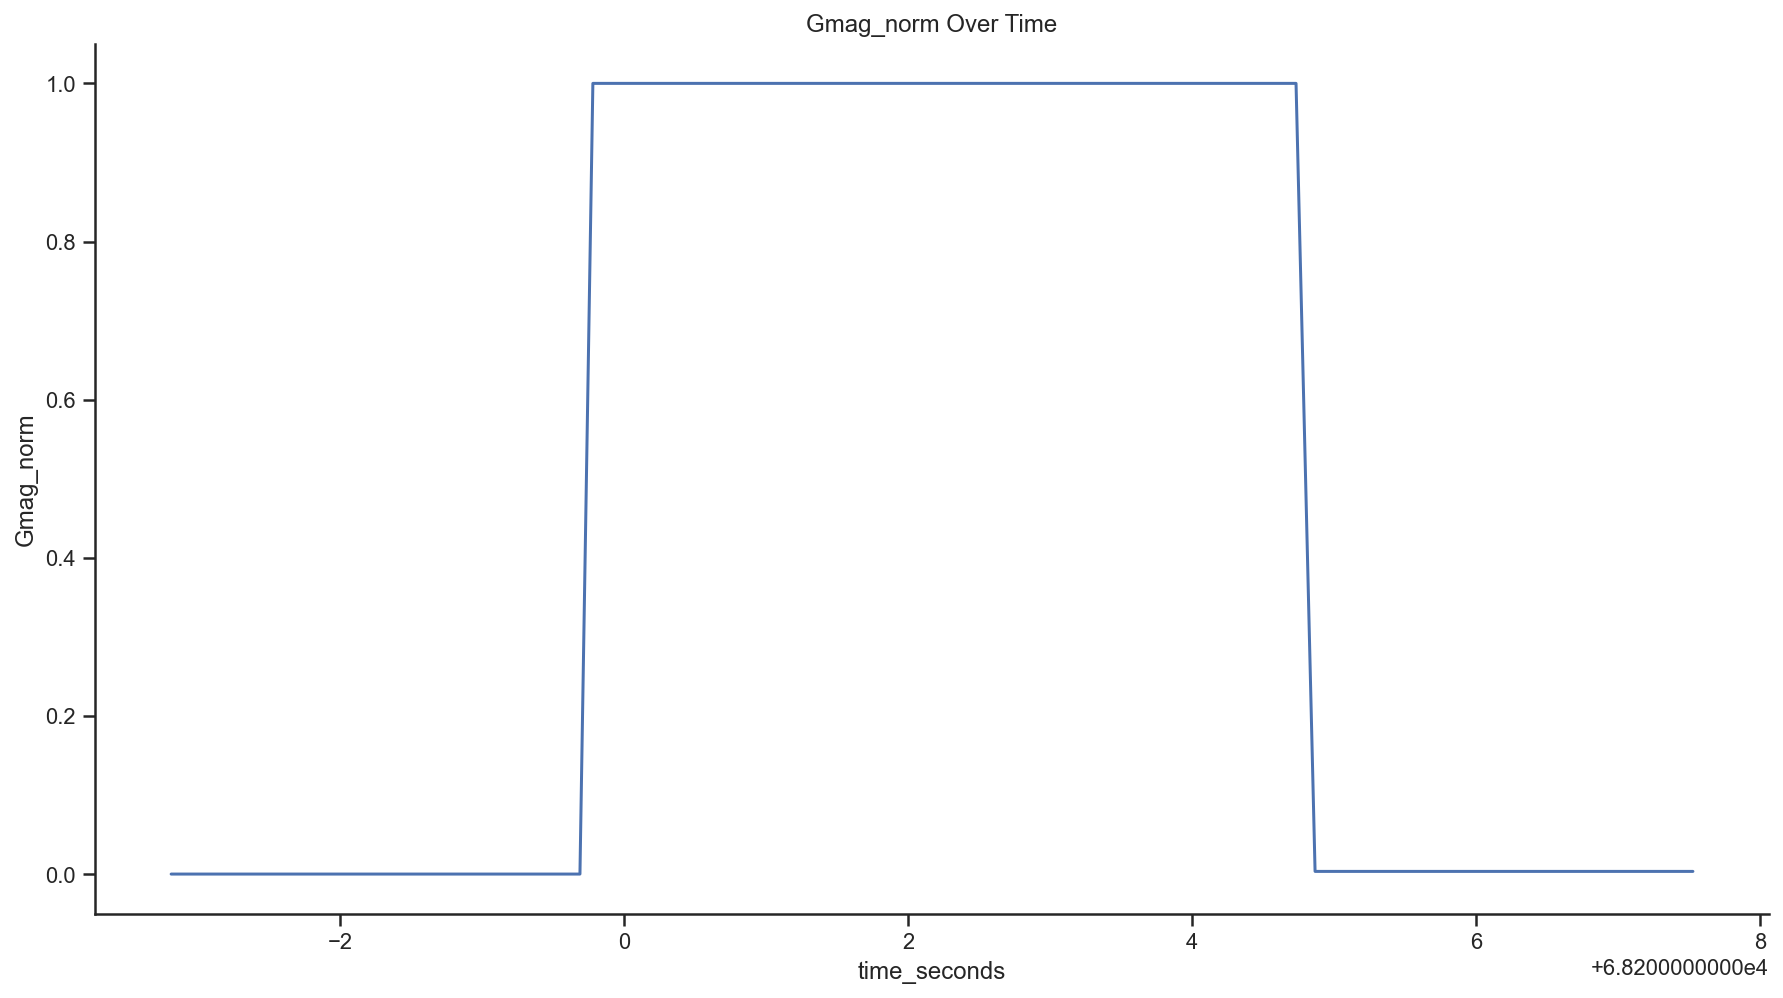

In [61]:
# Adjusting the size and adding title
plt.figure(figsize=(15,8))
plt.title('Gmag_norm Over Time')

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.dpi':144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
sns.despine()

# Creating the line plot
ax=sns.lineplot(data=Gyro_5_throwing_bike, x='time_seconds', y='Gmag_norm')

#Saving the line plot
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig('Gyro_5_Gmag_norm Over Time.png')

In [62]:
# Check how long bike stayed in different Gmag Zones
Gyro5_Gmag_norm_levels = Gyro_5_throwing_bike.groupby('Gmag_norm').agg(
    Time_Start=('time_seconds', np.min),
    Time_End=('time_seconds', np.max),
    Duration=('time_seconds_delta',np.sum))

# View the df
Gyro5_Gmag_norm_levels

,Time_Start,Time_End,Duration
Gmag_norm,,,
0.000000,68196.812,68199.690,2.878
0.003368,68204.865,68207.525,2.794
1.000000,68199.781,68204.731,5.041


In [63]:
# Install necessary library for df export as png
import dataframe_image as dfi

#Saving the dataframe as png
dfi.export(Gyro5_Gmag_norm_levels,"Gyro5_Gmag_norm_levels.png")

objc[75756]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x1184d3668). One of the two will be used. Which one is undefined.
[1022/145343.221736:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpttirq1ku/temp.png.


In [64]:
# Apply the different thresholds to data. 

# Q3 (75th percentile) threshold
Gyro_5_throwing_bike['Q3 threshold'] = Gyro_5_throwing_bike['Gmag_norm'].apply(Gmag_Q3_thresholds)

# Standard deviation threshold
Gyro_5_throwing_bike['Std threshold'] = Gyro_5_throwing_bike['Gmag_norm'].apply(Gmag_std_threshold)

# High Outlier threshold
Gyro_5_throwing_bike['HO threshold'] = Gyro_5_throwing_bike['Gmag_norm'].apply(Gmag_HO_threshold)

In [65]:
# Preview the data.
Gyro_5_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68196.812,0.000,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
1,68196.902,0.090,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
2,68196.992,0.090,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
3,68197.082,0.090,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data


In [66]:
# Check the distribution of normal/abnormal for each threshold

print(Gyro_5_throwing_bike['Q3 threshold'].value_counts())
print(Gyro_5_throwing_bike['Std threshold'].value_counts())
print(Gyro_5_throwing_bike['HO threshold'].value_counts())

Normal data      51
Abnormal data    46
Name: Q3 threshold, dtype: int64
Normal data      51
Abnormal data    46
Name: Std threshold, dtype: int64
Normal data      51
Abnormal data    46
Name: HO threshold, dtype: int64


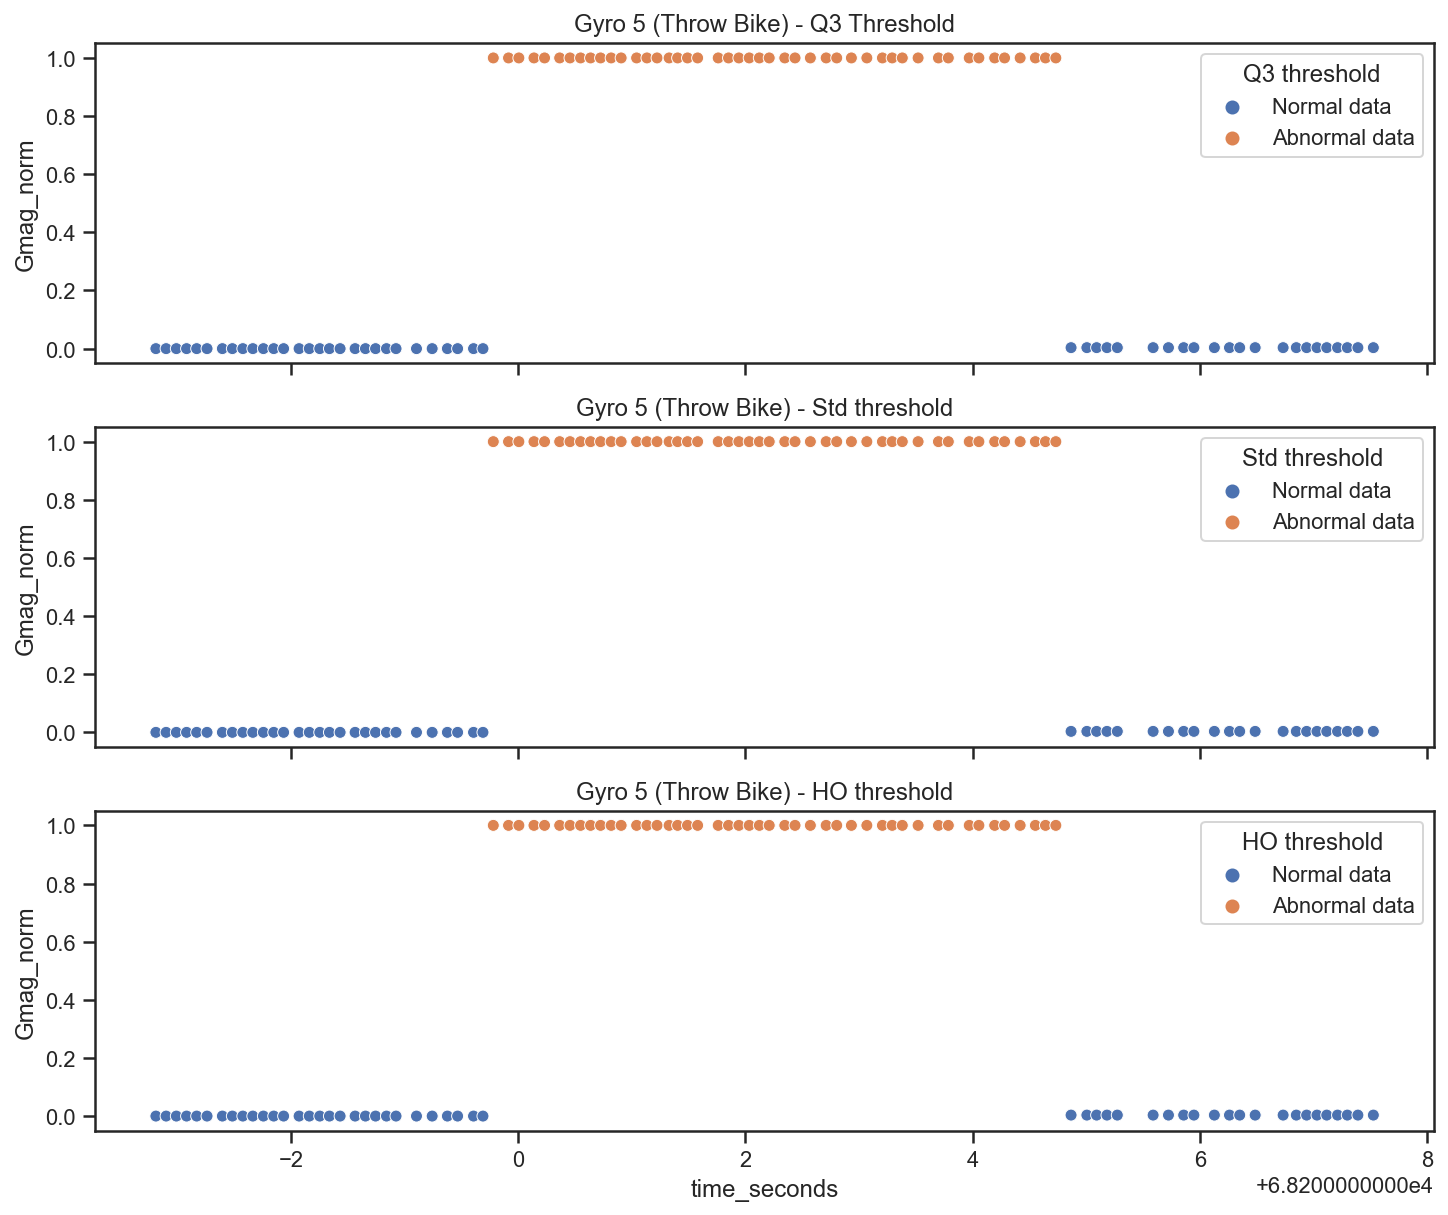

In [67]:
# Visualise the simple classification of normalised fAmag data.

hue_order = ['Normal data', 'Abnormal data']

fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Gyro_5_throwing_bike, ax=axes[0], x = 'time_seconds', y = 'Gmag_norm', hue = 'Q3 threshold', hue_order= hue_order).set(title = 'Gyro 5 (Throw Bike) - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Gyro_5_throwing_bike, ax=axes[1], x = 'time_seconds', y = 'Gmag_norm', hue = 'Std threshold', hue_order= hue_order).set(title = 'Gyro 5 (Throw Bike) - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Gyro_5_throwing_bike, ax=axes[2], x = 'time_seconds', y = 'Gmag_norm', hue = 'HO threshold', hue_order= hue_order).set(title = 'Gyro 5 (Throw Bike) - HO threshold')

fig.savefig("Gyro_5_throwing_bike Abnormalities.png")


In [68]:
Gyro_5_throwing_bike_Q3_levels= Gyro_5_throwing_bike.groupby('Q3 threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
Gyro_5_throwing_bike_Q3_levels

,Duration
Q3 threshold,
Abnormal data,5.041
Normal data,5.672


In [69]:
Gyro_5_throwing_bike_Std_levels= Gyro_5_throwing_bike.groupby('Std threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
Gyro_5_throwing_bike_Std_levels

,Duration
Std threshold,
Abnormal data,5.041
Normal data,5.672


In [70]:
Gyro_5_throwing_bike_HO_levels= Gyro_5_throwing_bike.groupby('HO threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))
Gyro_5_throwing_bike_HO_levels

,Duration
HO threshold,
Abnormal data,5.041
Normal data,5.672


In [71]:
# Install necessary library for df export as png
import dataframe_image as dfi

#Saving the dataframe as png
dfi.export(Gyro_5_throwing_bike_Q3_levels.head(1),"Gyro_5_throwing_bike_Q3_levels.png")
dfi.export(Gyro_5_throwing_bike_Std_levels.head(1),"Gyro_5_throwing_bike_Std_levels.png")
dfi.export(Gyro_5_throwing_bike_HO_levels.head(1),"Gyro_5_throwing_bike_HO_levels.png")

#Saving the dataframe as png
#dfi.export(Gyro_5_throwing_bike_Q3_levels,"Gyro_5_throwing_bike_Q3_levels.png")
#dfi.export(Gyro_5_throwing_bike_Std_levels,"Gyro_5_throwing_bike_Std_levels.png")
#dfi.export(Gyro_5_throwing_bike_HO_levels,"Gyro_5_throwing_bike_HO_levels.png")

objc[75777]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10d5af668). One of the two will be used. Which one is undefined.
[1022/145347.064406:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmphwf0e6wp/temp.png.
objc[75787]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb45bd8ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x1114a7668). One of the two will be used. Which one is undefined.
[1022/145348.833456:INFO:headless_shell.cc

In [72]:
# Export as new CSV for Step 
Gyro_5_throwing_bike.to_csv('Gyro_5_throwing_bike_normal_vs_abnormal.csv')